# **California Housing**  Comparison GBM and RF 

Replication of analysis from The Elements of Statistical Learning, 10.14.

Y
---
```
1. median House Value
```

X
---
```
1. median income
2. housing median age
3. total rooms
4. total bedrooms
5. population
6. households
7. latitude
8. longitude
```

Implementation Details
---
```
Split : 80 20
Learning rate(v) analysis: 0.1
Terminal Nodes(J) : 6
**Loss function : Huber **
```

Expectations
---
```
800 iterations => leveling of AAE to ~0.31



# **Preprocessesing**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import xgboost as xgb

labels = ['long','lat','med age','rooms','tot bed','pop','hos','med inc']

# importing
ds = pd.read_csv("housing.csv", "," )
ds = ds.drop(labels="ocean_proximity", axis=1)

# Fix missing information
column_means = ds.mean()
ds = ds.fillna(column_means)

# get values
y,x = ds.iloc[:, -1].values, ds.iloc[:,:-1].values
x = scale(x)
y = scale(y)


x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=1)


# **Model Training**

In [ ]:

# Set up variables that will be used for plotting
model_names = [
'RF m=2',
'RF m=6',
'GBM depth=4', 
'GBM depth=6',
]

M = 200 # Number of trees
eval_set = [(x_train, y_train), (x_test, y_test)]

# we will store performance of the models in this order
model_performance = [ [], [], [], [] ]

# Starting with Random Forests
for i in [0,1]:
  features = (2 if i==0 else 6)
  
  for j in range(0,M+10,10):
    clf = RandomForestRegressor( max_features = features, n_estimators=j+1 )
    clf.fit(x_train, y_train)
    
    preds = clf.predict(x_test)
    final_error = mean_absolute_error(preds, y_test)

    model_performance[i].append(final_error)
  
  print(f'{model_names[i]}: {final_error}')
    


for i in [2,3]:

  model = xgb.XGBRegressor(
      learning_rate=0.05,
      max_leaves=6,
      eval_metric='mae',
      max_depth=2*i, # 2*2 = 4 , 2*3 = 6, just like the project asks :)
      n_estimators=M, 
      single_precision_histogram=True, #supposed to run faster?
      )

  model = model.fit(x_train, y_train, eval_set=eval_set, verbose=False)

  preds = (model.predict(x_test))
  final_error = mean_absolute_error(preds, y_test)

  results = model.evals_result()
  testing_err = results['validation_1']['mae'] #This is the key for testing error
  print(len(testing_err))
  model_performance[i]=testing_err

  print(f'{model_names[i]}: {final_error}'  )

RF m=2: 0.29541040195408086
RF m=6: 0.27180295629492673
[[0.47277270489875967, 0.31666073098991665, 0.30625195793294485, 0.30858263067241753, 0.30370392447867584, 0.2997910919248556, 0.2981695508981926, 0.2986325649638659, 0.2996259660557177, 0.2958200408874736, 0.29768614656081654, 0.29929889091204037, 0.2981615243537173, 0.29973940439781244, 0.2969574430707279, 0.2982258318010824, 0.2965405166544223, 0.2957399485356848, 0.2970079333961566, 0.2958293251835968, 0.29541040195408086], [0.4281137691779003, 0.28863205703061906, 0.28080197555552927, 0.27673916402262494, 0.27711261349470606, 0.27537790500044046, 0.2743142503159625, 0.273136161860309, 0.2736272482369844, 0.2725920027571163, 0.272340517207563, 0.2726553884434619, 0.2717273622175771, 0.27071632064715745, 0.27202269306732413, 0.2714555894764018, 0.2712985919572713, 0.27174593264767105, 0.2717827985578521, 0.2711523105426769, 0.27180295629492673], [], []]
21
[16:02:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:

[[0.3215577192204835, 0.3042231512350546, 0.301396827268967, 0.3042858860515509, 0.30187555918386894, 0.2980007053663812, 0.29808956082953514, 0.2983484048266401, 0.29790239838762433, 0.2982401674608172, 0.2973894922066404, 0.29823495977077863, 0.2994266004159084, 0.29712995446134677, 0.29628776144011304, 0.29619938876134877, 0.29830173617708994, 0.2979900704710056, 0.29774572249927894, 0.29708164621624894], [0.2879312069179186, 0.28207719030931916, 0.2773566603318994, 0.2747873190288481, 0.2764508354298846, 0.27604908830630365, 0.27290057336613166, 0.27383559450486056, 0.2747352575520294, 0.2714834598459489, 0.27286774447258844, 0.2714795695185884, 0.2727132751078845, 0.2734240762706287, 0.2721757332980657, 0.2726465704648354, 0.27026277160346923, 0.2713844251276778, 0.2713457539168448, 0.2716811235891242], [0.910299, 0.854993, 0.805711, 0.761779, 0.723033, 0.688858, 0.659472, 0.632734, 0.609454, 0.588681, 0.570303, 0.55312, 0.536773, 0.522383, 0.510571, 0.49852, 0.488377, 0.477836, 0

# **Results**

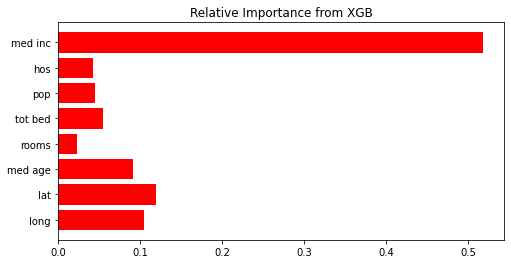

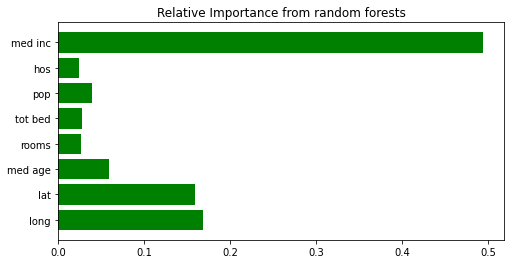

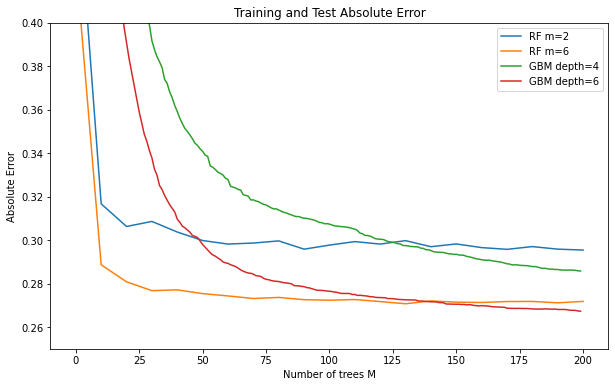

In [ ]:
# XGB feature importance
importance = model.feature_importances_
plt.figure( figsize=(8,4) )
plt.barh( labels, importance, color='r')
plt.title('Relative Importance from XGB')
plt.show()

# Random forest feature importance
importance = clf.feature_importances_
plt.figure( figsize=(8,4) )
plt.barh( labels, importance, color='g')
plt.title('Relative Importance from random forests')
plt.show()

x_axis = range( 0, M )
x_axis_sparse = range( 0, M+10, 10 ) # for random forest, to cut training time

plt.figure( figsize=(10,6) )
for i in [0,1,2,3]:
  if i<2: # forest
    plt.plot( x_axis_sparse, model_performance[i], markersize=4, label=model_names[i] )
  else:   # xgb
    plt.plot( x_axis, model_performance[i], markersize=4, label=model_names[i] )

plt.xlabel('Number of trees M')
plt.ylabel('Absolute Error')
plt.title('Training and Test Absolute Error')
plt.legend()
plt.ylim(0.25,0.4);

**Feature Selection**
---
Random forest seems to have picked the 3 most important features in accordance with xgb. These features are : Median income, longitude, and latitude.

The random forest model puts a lot more importance on just these 3 top features that it causes the lesser important features to have smaller relative importance compared to XGB.

Although the order of importance for the most important features is the same for both models, random forest puts a lot of importance in the top few that it messes up the importance order for the less important features when compared to XGB.


**Model Performance**
---
We do not know the learning rates used in figure 15.3, but the general performance of the two models match the performance in the textbook.

To improve the speed of the training, we only took sparse data points so the graphs look very rough compared to the smooth curves of the textbook.

The random forest regression model is seen to converge very quickly to some value.

The extreme gradient boost keeps improving through its small iterative residual trees so with enough iterations it passes the predictive power of random forest.

# **Second Dataset**

RF m=2: 0.4929070917318585
RF m=6: 0.49935850316886476
[16:59:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
200
GBM depth=6: 0.503495836889146
[16:59:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
200
GBM depth=9: 0.4775083718941714


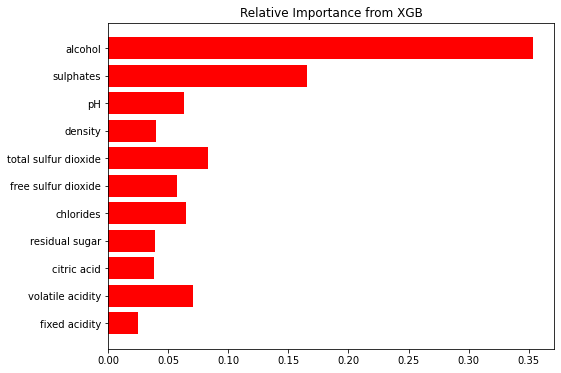

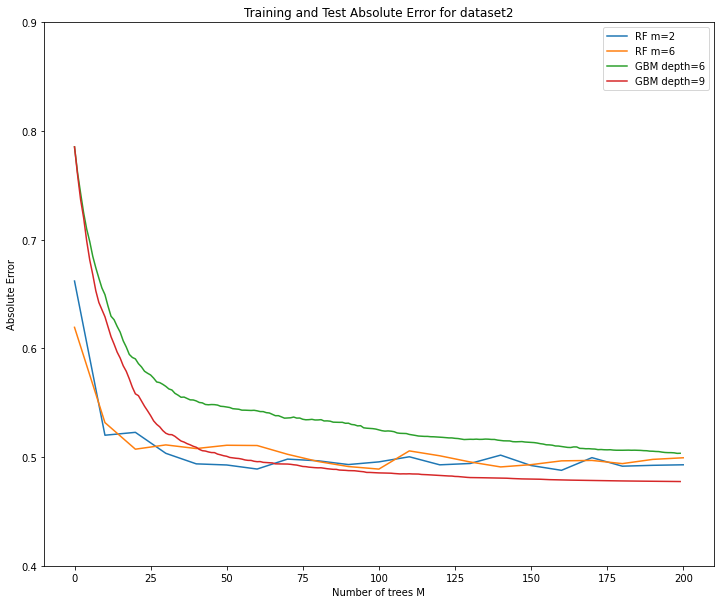

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import xgboost as xgb

#import data
ds = pd.read_csv('winequality-red.csv', ";")
labels = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
#mean
column_means = ds.mean()
ds = ds.fillna(column_means)

y,x = ds.iloc[:, -1].values, ds.iloc[:,:-1].values
x = scale(x)
y = scale(y)

#datasplit .8, .2
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=1)


model_names = [
'RF m=2',
'RF m=6',
'GBM depth=6', 
'GBM depth=9',
]

M = 200 # Number of trees
eval_set = [(x_train, y_train), (x_test, y_test)]

model_performance = [ [], [], [], [] ]

# Starting with Random Forests
for i in [0,1]:
  features = (2 if i==0 else 6)
  for j in range(0,M+10,10):
    clf = RandomForestRegressor( max_features = features, n_estimators=j+1 )
    clf.fit(x_train, y_train)
    
    preds = clf.predict(x_test)
    final_error = mean_absolute_error(preds, y_test)

    model_performance[i].append(final_error)
  
  print(f'{model_names[i]}: {final_error}')

#XGB
for i in [2,3]:

  model = xgb.XGBRegressor(
      learning_rate=0.1,
      max_leaves=6,
      eval_metric='mae',
      max_depth=3*i,
      n_estimators=M, 
      single_precision_histogram=True, #supposed to run faster?
      )

  model = model.fit(x_train, y_train, eval_set=eval_set, verbose=False)

  preds = (model.predict(x_test))
  final_error = mean_absolute_error(preds, y_test)

  results = model.evals_result()
  testing_err = results['validation_1']['mae'] #This is the key for testing error
  print(len(testing_err))
  model_performance[i]=testing_err

  print(f'{model_names[i]}: {final_error}'  )

  # XGB feature importance
importance = model.feature_importances_
plt.figure( figsize=(8,6) )
plt.barh( labels, importance, color='r')
plt.title('Relative Importance from XGB')
plt.show()

x_axis = range( 0, M )
x_axis_sparse = range( 0, M+10, 10 ) # for random forest, to cut training time

plt.figure( figsize=(12,10) )
for i in [0,1,2,3]:
  if i<2: # forest
    plt.plot( x_axis_sparse, model_performance[i], markersize=4, label=model_names[i] )
  else:   # xgb
    plt.plot( x_axis, model_performance[i], markersize=4, label=model_names[i] )

plt.xlabel('Number of trees M')
plt.ylabel('Absolute Error')
plt.title('Training and Test Absolute Error for dataset2')
plt.legend()
plt.ylim(0.4,0.9);